In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
boston = load_boston()
data = boston.data
target = boston.target
x_train,x_test,y_train,y_test = train_test_split(data, target)

### 使用线性回归模型
对线性回归boost并没有意义，因为叠加多个线性回归最后还是线性回归

线性回归是有解析解的，一旦求出一个线性回归，那一定是最优的，叠加也没有意义

所以一般不对线性回归使用boosting

In [8]:
reg_ = LinearRegression()
reg_.fit(x_train, y_train)
pred_ = reg_.predict(x_test)
print('训练集得分：', reg_.score(x_train, y_train))
print('测试集得分：', reg_.score(x_test, y_test))
print('均方误差：', metrics.mean_squared_error(y_test, pred_))

训练集得分： 0.7298891932200392
测试集得分： 0.7351806924160531
均方误差： 30.92014965838349


In [9]:
reg = AdaBoostRegressor(LinearRegression(), n_estimators=1000)
reg.fit(x_train, y_train)
pred = reg.predict(x_test)
print('训练集得分：', reg.score(x_train, y_train))
print('测试集得分：', reg.score(x_test, y_test))
print('均方误差：', metrics.mean_squared_error(y_test, pred))

训练集得分： 0.7063041789981057
测试集得分： 0.6902012369993812
均方误差： 36.17192493762824


### 使用回归树

In [5]:
clf = DecisionTreeRegressor(max_depth=5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('训练集得分：', clf.score(x_train, y_train))
print('测试集得分：', clf.score(x_test, y_test))
print('均方误差：', metrics.mean_squared_error(y_test, y_pred))

训练集得分： 0.9167912729309377
测试集得分： 0.8159937909932669
均方误差： 21.484458865433847


In [10]:
clf_ = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=1000)
clf_.fit(x_train, y_train)
y_pred_ = clf_.predict(x_test)
print('训练集得分：', clf_.score(x_train, y_train))
print('测试集得分：', clf_.score(x_test, y_test))
print('均方误差：', metrics.mean_squared_error(y_test, y_pred_))

训练集得分： 0.9659405172797815
测试集得分： 0.8469645674421272
均方误差： 17.868328865050326


### 尝试分类问题
### 使用决策树进行分类

In [40]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier

iris = load_iris()
iris_data = iris.data
iris_target = iris.target
x_train, x_test, y_train ,y_test = train_test_split(iris_data, iris_target)

In [32]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(x_train, y_train.astype('int'))
pred = clf.predict(x_test)
confusion_matrix = confusion_matrix(pred, y_test)
print("训练集分数：",clf.score(x_train,y_train))
print("验证集分数：",clf.score(x_test,y_test))
print(confusion_matrix)

训练集分数： 1.0
验证集分数： 0.9473684210526315
[[10  0  0]
 [ 0 13  1]
 [ 0  1 13]]


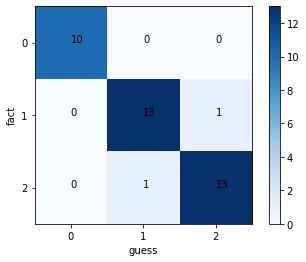

In [39]:
classes = list(set(pred))
plt.imshow(confusion_matrix, cmap=plt.cm.Blues)
indices = range(len(confusion_matrix))
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.colorbar()
plt.xlabel('guess')
plt.ylabel('fact')
for first_index in range(len(confusion_matrix)):
    for second_index in range(len(confusion_matrix[first_index])):
        plt.text(first_index, second_index, confusion_matrix[first_index][second_index])
plt.show()

In [41]:
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=100)
clf.fit(x_train, y_train.astype('int'))
pred = clf.predict(x_test)
confusion_matrix = confusion_matrix(pred, y_test)
print("训练集分数：",clf.score(x_train,y_train))
print("验证集分数：",clf.score(x_test,y_test))
print(confusion_matrix)

训练集分数： 1.0
验证集分数： 1.0
[[11  0  0]
 [ 0 10  0]
 [ 0  0 17]]


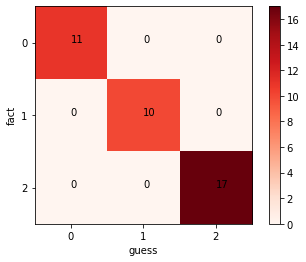

In [50]:
classes = list(set(pred))
plt.imshow(confusion_matrix, cmap=plt.cm.Reds)
indices = range(len(confusion_matrix))
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.colorbar()
plt.xlabel('guess')
plt.ylabel('fact')
for first_index in range(len(confusion_matrix)):
    for second_index in range(len(confusion_matrix[first_index])):
        plt.text(first_index, second_index, confusion_matrix[first_index][second_index])
plt.show()